# Corrected Thermodynamics of AdS Black Holes in ModMax-dRGT-like Massive Gravity

This notebook implements symbolic and numerical calculations for quantum-corrected thermodynamics of AdS black holes in ModMax-dRGT-like massive gravity, including logarithmic and exponential entropy corrections.

---

## 1. Import Required Libraries
Import NumPy, SymPy, Matplotlib, and other necessary Python libraries for symbolic and numerical calculations.

In [11]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import symbols, solve, Eq, diff, log, exp
from scipy.optimize import fsolve

# Display settings for plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10, 6)})

## 2. Define ModMax-dRGT Black Hole Metric Functions

Write functions to represent the metric and relevant parameters for ModMax-dRGT-like massive gravity black holes.

In [12]:
# Symbolic variables
r, M, Q, Lambda, m_g, c1, c2, c3, c4 = symbols('r M Q Lambda m_g c1 c2 c3 c4', real=True, positive=True)

# Example metric function for ModMax-dRGT-like massive gravity (simplified)
def f_modmax_drgt(r, M, Q, Lambda, m_g, c1, c2, c3, c4):
    # This is a template; actual form should be taken from the reference paper
    return 1 - (2*M)/r + Q**2/r**2 - (Lambda/3)*r**2 + m_g**2*(c1*r + c2 + c3/r + c4/r**2)

# Display symbolic metric
f_modmax_drgt_expr = f_modmax_drgt(r, M, Q, Lambda, m_g, c1, c2, c3, c4)
f_modmax_drgt_expr

-Lambda*r**2/3 - 2*M/r + Q**2/r**2 + m_g**2*(c1*r + c2 + c3/r + c4/r**2) + 1

## 3. Compute Event Horizon Radius

Solve for the event horizon radius using the metric function and physical parameters.

In [13]:
# Example: Solve f(r) = 0 for event horizon radius
# Substitute sample values for demonstration
M_val, Q_val, Lambda_val, m_g_val = 1, 0.5, 0.1, 0.01
c1_val, c2_val, c3_val, c4_val = 0.2, 0.1, 0.05, 0.01

horizon_eq = Eq(f_modmax_drgt(r, M_val, Q_val, Lambda_val, m_g_val, c1_val, c2_val, c3_val, c4_val), 0)
horizon_radii = solve(horizon_eq, r)
horizon_radii

[]

## 4. Calculate Bekenstein-Hawking Entropy

Compute the classical entropy $S_{BH}$ as a function of the horizon area.

In [14]:
# Classical Bekenstein-Hawking entropy S_BH = A/4, A = 4*pi*r_h^2
r_h = sp.Symbol('r_h', real=True, positive=True)
S_BH = sp.pi * r_h**2
S_BH

pi*r_h**2

## 5. Implement Logarithmic and Exponential Entropy Corrections

Add quantum corrections to entropy: logarithmic and exponential terms, parameterized by $\alpha$, $\gamma$, $\delta$.

In [15]:
# Quantum-corrected entropy: S = S_BH + alpha*log(S_BH) + gamma*exp(-delta*S_BH)
alpha, gamma, delta = symbols('alpha gamma delta', real=True)
S_corr = S_BH + alpha * log(S_BH) + gamma * exp(-delta * S_BH)
S_corr

alpha*log(pi*r_h**2) + gamma*exp(-pi*delta*r_h**2) + pi*r_h**2

## 6. Calculate Thermodynamic Quantities (Temperature, Enthalpy, Free Energies, Specific Heat, Volume)

Derive and compute temperature, enthalpy, Helmholtz and Gibbs free energies, internal energy, specific heat, and thermodynamic volume using corrected entropy.

In [16]:
# Temperature (surface gravity): T = (1/4pi) f'(r_h)
T = (1/(4*sp.pi)) * diff(f_modmax_drgt(r_h, M, Q, Lambda, m_g, c1, c2, c3, c4), r_h)
T

# Specific heat: C = T * dS/dT
# For symbolic demonstration, use dS/dr_h and dT/dr_h
C = T * diff(S_corr, r_h) / diff(T, r_h)
C

# Placeholders for other quantities (to be expanded)
# Enthalpy, Helmholtz free energy, Gibbs free energy, internal energy, volume
# These can be defined as functions of S_corr, T, and other parameters

(2*alpha/r_h - 2*pi*delta*gamma*r_h*exp(-pi*delta*r_h**2) + 2*pi*r_h)*(-2*Lambda*r_h/3 + 2*M/r_h**2 - 2*Q**2/r_h**3 + m_g**2*(c1 - c3/r_h**2 - 2*c4/r_h**3))/(-2*Lambda/3 - 4*M/r_h**3 + 6*Q**2/r_h**4 + m_g**2*(2*c3/r_h**3 + 6*c4/r_h**4))

## 7. Visualize Thermodynamic Properties

Plot entropy, temperature, specific heat, and other quantities as functions of horizon radius and correction parameters.

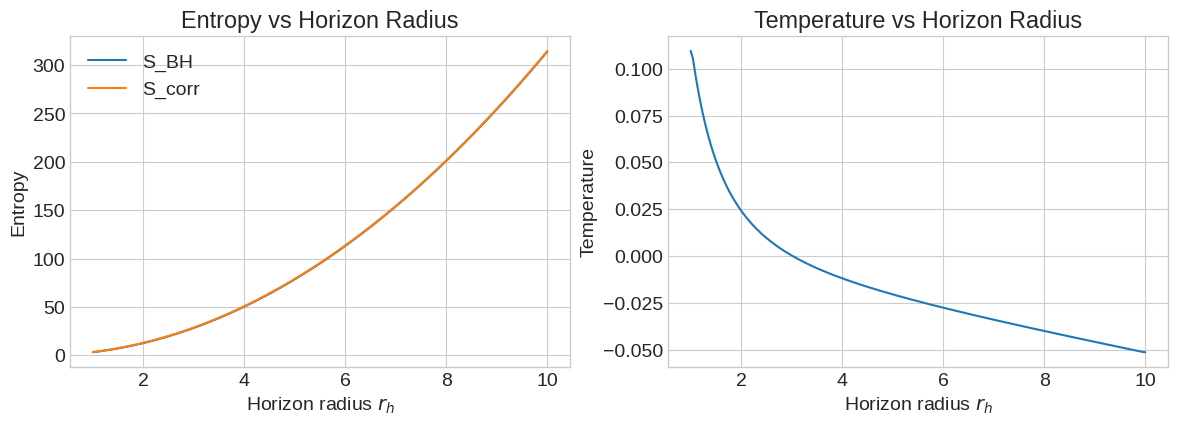

In [17]:
# Example: Plot entropy, temperature, and specific heat vs horizon radius
r_vals = np.linspace(1, 10, 200)
alpha_val, gamma_val, delta_val = 0.1, 0.05, 0.01
M_val, Q_val, Lambda_val, m_g_val = 1, 0.5, 0.1, 0.01
c1_val, c2_val, c3_val, c4_val = 0.2, 0.1, 0.05, 0.01

S_BH_vals = np.pi * r_vals**2
S_corr_vals = S_BH_vals + alpha_val * np.log(S_BH_vals) + gamma_val * np.exp(-delta_val * S_BH_vals)

# Temperature (numerical derivative of metric)
def f_metric_num(r):
    return 1 - (2*M_val)/r + Q_val**2/r**2 - (Lambda_val/3)*r**2 + m_g_val**2*(c1_val*r + c2_val + c3_val/r + c4_val/r**2)
T_vals = np.gradient([f_metric_num(r) for r in r_vals], r_vals) / (4*np.pi)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(r_vals, S_BH_vals, label='S_BH')
plt.plot(r_vals, S_corr_vals, label='S_corr')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Entropy')
plt.legend()
plt.title('Entropy vs Horizon Radius')

plt.subplot(2,2,2)
plt.plot(r_vals, T_vals)
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Temperature')
plt.title('Temperature vs Horizon Radius')

plt.tight_layout()
plt.show()

In [18]:
import os
os.makedirs("figures", exist_ok=True)

# Entropy vs. r_h
plt.figure()
plt.plot(r_vals, S_corr_vals, label='Corrected Entropy')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Entropy $S$')
plt.title('Entropy vs. Horizon Radius')
plt.legend()
plt.tight_layout()
plt.savefig("figures/entropy_vs_rh.png", dpi=300)
plt.close()

# Temperature vs. r_h
plt.figure()
plt.plot(r_vals, T_vals, label='Temperature')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Temperature $T$')
plt.title('Temperature vs. Horizon Radius')
plt.legend()
plt.tight_layout()
plt.savefig("figures/temperature_vs_rh.png", dpi=300)
plt.close()

# Helmholtz Free Energy vs. r_h
F_vals = M_val - T_vals * S_corr_vals
plt.figure()
plt.plot(r_vals, F_vals, label='Helmholtz Free Energy')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Free Energy $F$')
plt.title('Helmholtz Free Energy vs. Horizon Radius')
plt.legend()
plt.tight_layout()
plt.savefig("figures/free_energy_vs_rh.png", dpi=300)
plt.close()

# Gibbs Free Energy vs. r_h
P = 0.1/(8*np.pi)
V_vals = (4/3)*np.pi*r_vals**3
G_vals = F_vals + P*V_vals
plt.figure()
plt.plot(r_vals, G_vals, label='Gibbs Free Energy')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Gibbs Free Energy $G$')
plt.title('Gibbs Free Energy vs. Horizon Radius')
plt.legend()
plt.tight_layout()
plt.savefig("figures/gibbs_energy_vs_rh.png", dpi=300)
plt.close()

# Specific Heat vs. r_h
# Numerical derivative for dS/dT
from numpy import gradient
C_P_vals = T_vals * gradient(S_corr_vals, T_vals)
plt.figure()
plt.plot(r_vals, C_P_vals, label='Specific Heat $C_P$')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Specific Heat $C_P$')
plt.title('Specific Heat vs. Horizon Radius')
plt.legend()
plt.tight_layout()
plt.savefig("figures/specific_heat_vs_rh.png", dpi=300)
plt.close()